In [5]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy as sp
from pprint import pprint
import quandl
from config import api_key
import numpy as np
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import linregress

In [6]:
#read in data file
master_csv = pd.read_csv("pw_master_data_cleaned.csv")
master_csv

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.00,30566,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.00,30566,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.00,30566,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.00,30566,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.00,30566,3.5,3.88,3.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020,Sep,2020-9,9/26/2020,NaN,CRAW,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67020,2020,Sep,2020-9,9/19/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.04,332367,6.4,NaN,NaN
67021,2020,Sep,2020-9,9/26/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67022,2020,Sep,2020-9,9/30/2020,NaN,CRSM,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.13,332367,6.4,NaN,NaN


In [7]:
#Isolate ISAM values

isam_df = master_csv.loc[master_csv['Indicator ID']=='ISAM']
isam_df = isam_df.drop_duplicates(subset=['Indicator ID', 'Value', 'Region Name'])

The correlation coefficient is 0.0
The line equation is as follows:  y = 7.92x + 5290.51


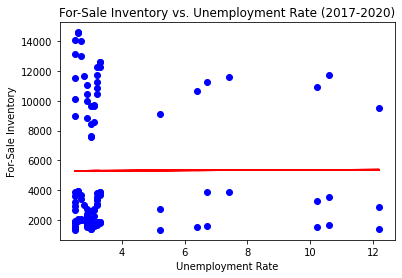

In [8]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['Unemployment Rate']
y_values = isam_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Unemployment Rate (2017-2020)")

#plt.xticks(rotation = 'vertical')
plt.rcParams["figure.figsize"] = (5,5)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

The correlation coefficient is 0.6
The line equation is as follows:  y = 0.01x + -2681.51


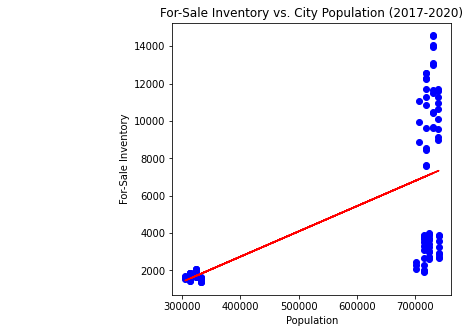

In [9]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['County Population']
y_values = isam_df['Value']

plt.xlabel('Population')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. City Population (2017-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_population.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

The correlation coefficient is -0.04
The line equation is as follows:  y = -299.46x + 6501.29


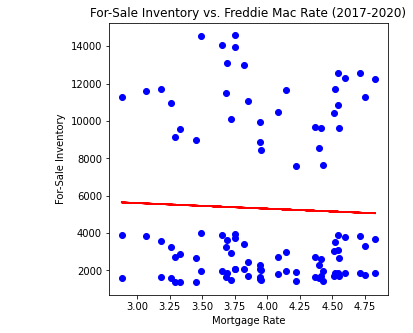

In [10]:
#combined graph for presentation -- Unemployment Rate
fmac_df = isam_df.dropna(axis=0, how='any')
x_values = fmac_df['Freddie Mac Rate']
y_values = fmac_df['Value']

plt.xlabel('Mortgage Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Freddie Mac Rate (2017-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_freddiemac.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [11]:
#sort master into 4 based on region name -- ended up just using Denver
denver_df = isam_df.loc[isam_df['Region Name']=='Denver, CO']
#greeley_df = isam_df.loc[master_csv['Region Name']=='Greeley, CO']
#csprings_df = isam_df.loc[master_csv['Region Name']=='Colorado Springs, CO']
#breck_df = isam_df.loc[master_csv['Region Name']=='Breckenridge, CO; CO']

In [12]:
#ISAM & IRSW for Denver
#denver_isam = denver_df.loc[denver_df['Indicator ID']=='ISAM']
#denver_isam

In [13]:
#ISAM for Colorado Springs -- didn't end up using this
#csprings_isam = csprings_df.loc[csprings_df['Indicator ID']=='ISAM']
#csprings_isam_grouped = csprings_isam.groupby("Year-Month").first()
#csprings_isam_grouped


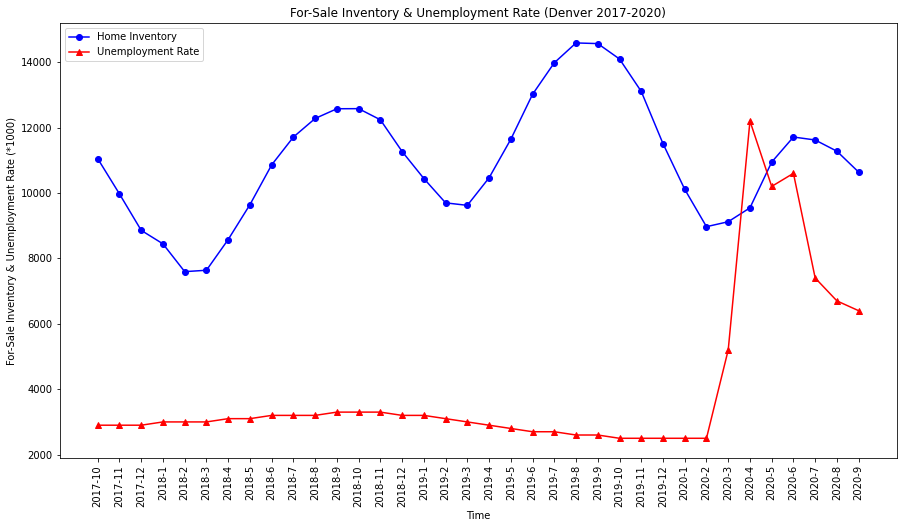

In [16]:
# Assign plots to tuples that stores result of plot
x_axis = denver_df['Year-Month']
inventory = denver_df['Value']
unemployment = denver_df['Unemployment Rate']*1000
# Each point on the sine chart is marked by a blue circle
sine_handle, = plt.plot(x_axis, inventory, marker ='o', color='blue', label="Home Inventory")
# Each apoint on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, unemployment, marker='^', color='red', label="Unemployment Rate")

plt.rcParams["figure.figsize"] = (15,8)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('For-Sale Inventory & Unemployment Rate (*1000)')
plt.title("For-Sale Inventory & Unemployment Rate (Denver 2017-2020)")
plt.legend(loc="upper left")
plt.savefig("denver_isam_unemployment_over_time.png")